## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and MSFT for the period ‘2002-1-1’ until 
today.

In [26]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib

### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [27]:
tickers = [
    'F','XOM','BP','LNC','MSFT'
];

mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo',
    start = '2002-1-1')['Adj Close'];
    
#This prints the first row of the entire data
print(mydata.iloc[0])

F        9.768824
XOM     24.363264
BP      20.110891
LNC     32.758705
MSFT    21.638731
Name: 2002-01-02 00:00:00, dtype: float64


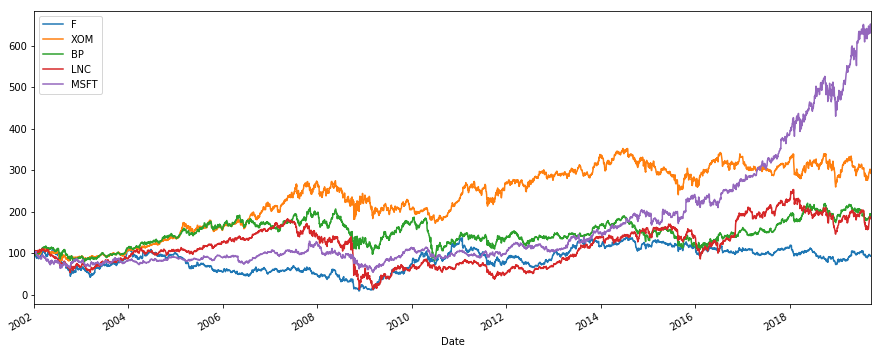

In [28]:
#This normalization will allow all the equities to originate from 100
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));

#XOM was on top- however, MSFT was able to rise in price
#The rest of the stocks stayed linearly in their zone

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [29]:
returns = (mydata / mydata.shift(1))-1

First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [30]:
weights = np.array([.25,.15,.25,.15,.20])
weights_2 = np.array([.10,.50,.20,.10,.10])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [31]:
annual_returns = returns.mean() * 250
np.dot(annual_returns, weights)
#The np.dot() calculates vector or matrix products
portfolio_1 = str(round(np.dot(annual_returns,weights), 4)*100)
print("Your portfolios return is: " + portfolio_1 + "%")

#and for different weights
np.dot(annual_returns, weights_2)
portfolio_2 = str(round(np.dot(annual_returns,weights_2), 4)*100)
print("Your second portfolios return is: " + portfolio_2 +"%")

Your portfolios return is: 10.54%
Your second portfolios return is: 9.75%
